# Chemical Segregation(Classification)
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
x = pd.read_csv("../Datasets/Logistic Regression/Logistic_X_Train.csv").values
y = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Train.csv").values
print(x.shape, y.shape)

(3000, 3) (3000, 1)


In [23]:
ones = np.ones((x.shape[0],1))
print(ones.shape)

(3000, 1)


In [24]:
x = np.hstack((x,ones))
print(x.shape)
print(x[:2,])

(3000, 4)
[[-1.23937466  0.74910149 -0.52851491  1.        ]
 [-1.03607028  0.80143631 -1.28371152  1.        ]]


In [91]:
def hypothesis(x,w):
    return sigmoid(np.dot(x,w))

def sigmoid(z):
    return 1/(1+np.exp(-z))

def error(x,w,y):
    ml = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w)
        ml += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
    err = -ml/x.shape[0]
    return err

def getGrads(x,y,w):
    grads = np.zeros(w.shape)
    for i in range(x.shape[0]):
        grads += (y[i] - hypothesis(x[i],w))*x[i]
    grads /= x.shape[0]
    return grads

def gradientDescent(x,y,learningRate=0.5, maxItr=100):
    w = np.zeros((x.shape[1],))
    errList = []
    for i in range(maxItr):
        err = error(x,w,y)
        errList.append(err)
        grads = getGrads(x,y,w)
        w += learningRate*grads
    return w,errList

        

In [92]:
w,errList = gradientDescent(x,y)

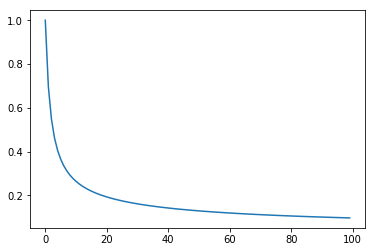

In [93]:
plt.plot(errList)
plt.show()

In [94]:
def predict(x,w):
    confidence = hypothesis(x,w)
    if(confidence<0.5):
        return 0
    else:
        return 1

In [95]:
xTest = pd.read_csv("../Datasets/Logistic Regression/Logistic_X_Test.csv").values
onesTest = np.ones((xTest.shape[0],1))
xTest = np.hstack((xTest,onesTest))
yTest = []
for i in range(xTest.shape[0]):
    yTest.append(predict(xTest[i],w))
yTest = np.array(yTest)
pd.DataFrame(yTest).to_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv", index= False)
yTestDF = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv")
yTestDF.columns = ["label"]
yTestDF.to_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv", index= False)
yTestDF = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv")
yTestDF.head()

,label
0,1
1,1
2,0
3,1
4,1
